# Post doctoral research paper implementation
Python notebook for the implementation of the different concepts to be explored in the spread of misinformation in Twitter
research by J.P. Hernandez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

MONKEYPOX_CSV = "./dataset/monkeypox_core_data.csv"
COVID_19_CSV = "./dataset/covid19_core_data.csv"

NAMESPACE = "post_doc_output"
NSPATH = f"./{NAMESPACE}"
RANGE_END = 1380

# set of variables from the pipeline will be saved here
DATASET_VARS = {
    "name_space": NAMESPACE
}

if os.path.exists(NSPATH):
    print("Namespace directory already exist")
else:
    print("Creating namespace directory...")
    os.mkdir(NSPATH)
    os.mkdir(f"{NSPATH}/figures")
    os.mkdir(f"{NSPATH}/csv_datasets")
    os.mkdir(f"{NSPATH}/audio_outputs")

monkeypox_pd = pd.read_csv(MONKEYPOX_CSV)
covid19_pd = pd.read_csv(COVID_19_CSV)


Namespace directory already exist


### Datasets Overview
Overview of the Input datasets from the disinformation pipeline / notebook

Data Overview:


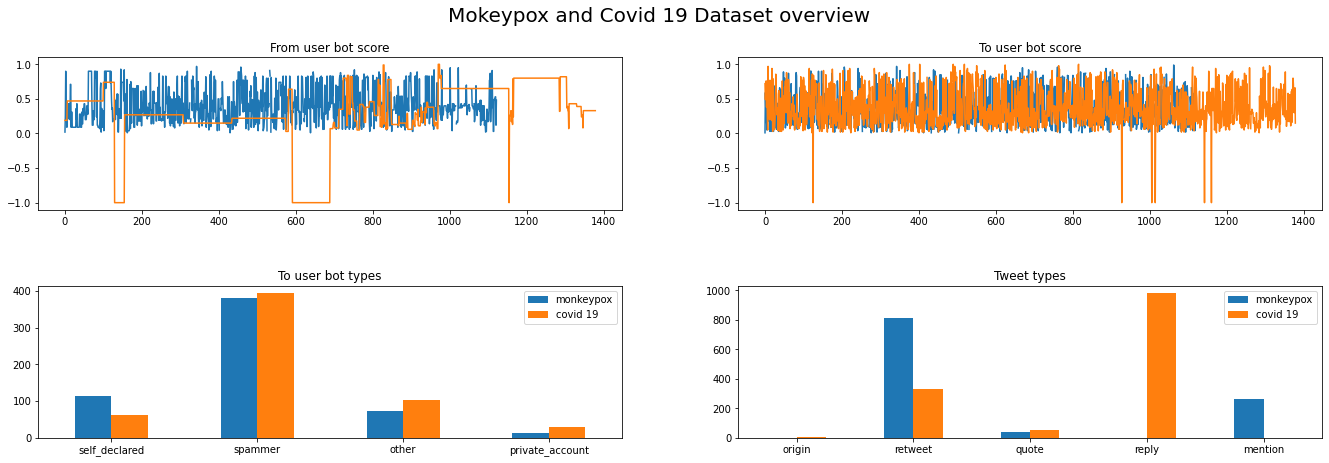

In [2]:
print("Data Overview:")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(23,7))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
monkeypox_pd["from_user_botscore"].plot(ax=axes[0, 0]);
covid19_pd["from_user_botscore"].plot(ax=axes[0, 0]);
axes[0, 0].set_title("From user bot score");
monkeypox_pd["to_user_botscore"].plot(ax=axes[0, 1]);
covid19_pd["to_user_botscore"].plot(ax=axes[0, 1]);

# bar chars for tweet tyoes
axes[0, 1].set_title("To user bot score");

monkeypox_values1 = pd.value_counts(monkeypox_pd["to_user_bot_type"])
covid19_values1 = pd.value_counts(covid19_pd["to_user_bot_type"])

mpcols = list(monkeypox_values1.keys())
cvcols = list(covid19_values1.keys())

mrcols = list(set(cvcols+mpcols))

tmx_values = []
tcv_values = []


for col in mrcols:
    if(col in monkeypox_values1.keys()):
        tmx_values.append(monkeypox_values1[col])
    else:
        tmx_values.append(0)
    
    if(col in covid19_values1.keys()):
        tcv_values.append(covid19_values1[col])
    else:
        tcv_values.append(0)


df = pd.DataFrame({'monkeypox': tmx_values,
                   'covid 19': tcv_values}, index=mrcols)

df.plot.bar(ax=axes[1, 0], rot=0);
axes[1, 0].set_title("To user bot types");

monkeypox_values1 = pd.value_counts(monkeypox_pd["tweet_type"])
covid19_values1 = pd.value_counts(covid19_pd["tweet_type"])

mpcols = list(monkeypox_values1.keys())
cvcols = list(covid19_values1.keys())

mrcols = list(set(cvcols+mpcols))

tmx_values = []
tcv_values = []


for col in mrcols:
    if(col in monkeypox_values1.keys()):
        tmx_values.append(monkeypox_values1[col])
    else:
        tmx_values.append(0)
    
    if(col in covid19_values1.keys()):
        tcv_values.append(covid19_values1[col])
    else:
        tcv_values.append(0)


df1 = pd.DataFrame({'monkeypox': tmx_values,
                   'covid 19': tcv_values}, index=mrcols)
df1.plot.bar(ax=axes[1, 1], rot=0);
axes[1, 1].set_title("Tweet types");
fig.suptitle("Mokeypox and Covid 19 Dataset overview", fontsize=20)

plt.savefig(f"{NSPATH}/figures/{NAMESPACE}_dataset-overview.png")

### Node Types Graph
> Comparing the types of nodes detected for each dataset
1. Monkeypox
2. Covid19

Monkey pox => total_bots => 742
Covid 19 => total_bots => 1491
Monkey pox => total_humans => 743
Covid 19 => total_humans => 1124
Monkey pox => total_tweets => 1422
Covid 19 => total_tweets => 2548


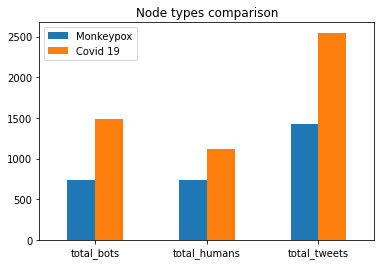

In [3]:
import pickle

filemp = open("./monkeypox/monkeypox-dataset-variables.p", 'rb')
filecv = open("./covid_19/covid_19-dataset-variables.p", "rb")
MP_DATASET_VARS = pickle.load(filemp)
CV_DATASET_VARS = pickle.load(filecv)
filemp.close()
filecv.close()

n_layers= ["total_bots", "total_humans", "total_tweets"]
mp_node_count = []
cv_node_count = []

for lx in n_layers:
    mp_node_count.append(MP_DATASET_VARS[lx])
    print(f"Monkey pox => {lx} =>", MP_DATASET_VARS[lx])
    cv_node_count.append(CV_DATASET_VARS[lx])
    print(f"Covid 19 => {lx} =>", CV_DATASET_VARS[lx])

# blot bar graph for both sets of values
df1 = pd.DataFrame({'Monkeypox': mp_node_count,
                   'Covid 19': cv_node_count}, index=n_layers)
df1.plot.bar(rot=0, title="Node types comparison");
plt.savefig(f"{NSPATH}/figures/{NAMESPACE} node types comparison.png")

### Functional Connectivity
A set of visualization demonstrating functional connectivity
1. Confusion Matrix using eigen states - not compatible due to data issues
2. Regression Scatter plots using eigen states

Eigen states -> evolution matrix from disinformation pipeline
Color mapping should be uniform with existing visualization

,node_entanglement,eigen_decomposition
0,-3.153258e-03,8.201494e-18
1,3.597083e-07,-7.750440e-23
2,3.597083e-07,-8.898650e-23
3,3.597083e-07,6.932407e-23
4,3.589219e-07,4.395232e-23
...,...,...
479,3.589219e-07,2.090692e-23
480,-3.153258e-03,-2.392072e-21
481,-3.153258e-03,-2.656889e-18
482,-2.513958e-05,-1.234584e-20


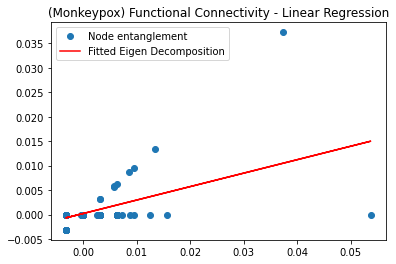

,node_entanglement,eigen_decomposition
0,-2.343949e-03,-3.793517e-19
1,-2.343949e-03,2.155821e-19
2,-2.343949e-03,8.401009e-20
3,-2.343949e-03,4.142265e-20
4,-2.343949e-03,-3.168521e-20
...,...,...
76,-8.211067e-06,-5.731495e-22
77,1.776357e-15,-4.506110e-32
78,-8.211067e-06,1.716354e-22
79,-8.211067e-06,-8.211067e-06


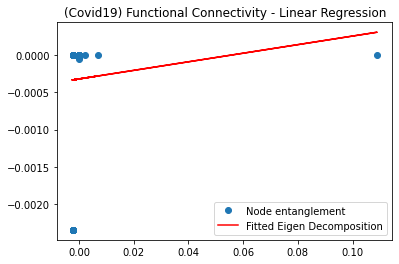

In [4]:

mp_eigen_decomp = MP_DATASET_VARS["eigen_decomposition"].real
cv_eigen_decomp = CV_DATASET_VARS["eigen_decomposition"].real

dataMap = [
    {
      "title":"(Monkeypox)",
      "network": MP_DATASET_VARS["complete_network"],
      "analysis": "./monkeypox/csv_datasets/monkeypox - 2nd_network_analysis_raw_data.csv",
      "audio":"./monkeypox/audio_outputs/monkeypox - spectrogram_audio.wav",
      "energy_txt":"./monkeypox/monkeypox-bot_energy.txt",   
      "ne": MP_DATASET_VARS["node_entanglement"],
      "de": np.array(MP_DATASET_VARS["eigen_decomposition"]).flatten().real,
      "dataVAR": MP_DATASET_VARS,
      "name_space": "monkeypox"
    },
     {
      "title":"(Covid19)",
      "network": CV_DATASET_VARS["complete_network"],
      "analysis": "./covid_19/csv_datasets/covid_19 - 2nd_network_analysis_raw_data.csv",
      "audio": "./covid_19/audio_outputs/covid_19 - spectrogram_audio.wav",
      "energy_txt":"./covid_19/covid_19-bot_energy.txt" ,
      "ne": CV_DATASET_VARS["node_entanglement"],
      "de": np.array(CV_DATASET_VARS["eigen_decomposition"]).flatten().real,
      "dataVAR": CV_DATASET_VARS,
      "name_space": "covid_19"
    },
    ]

 
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.metrics import confusion_matrix

for item in dataMap:

  x = np.array(item["ne"][0:len(item["de"])])
  y =x*np.array(item["de"])


  res = stats.linregress(x, y)

  plt.plot(x, y, 'o', label='Node entanglement')
  plt.plot(x, res.intercept + res.slope*x, 'r', label='Fitted Eigen Decomposition')
  plt.legend()
  plt.title(f"{item['title']} Functional Connectivity - Linear Regression")
  plt.savefig(f"{NAMESPACE}/figures/{item['title']} Functional Connectivity - Linear Regression")

  fcdf = pd.DataFrame()

  fcdf["node_entanglement"] = x
  fcdf["eigen_decomposition"] = y

  display(fcdf)

  fcdf.to_csv(f"{NAMESPACE}/csv_datasets/{item['title']} Functional Connectivity - Linear Regression.csv")
  plt.show()

# confusion matrix - not compatible due to nature of data
# gtr =  x[0:3] * 100
# predicted =  y[0:3] * 100
# cmx = confusion_matrix(gtr, predicted)

# print(cmx)

### Network Polarization
> Network Polarization using dendograms

1. Dendogram Visualization (Explore if possible) - https://python-louvain.readthedocs.io/en/latest/api.html
2. use louvain community data from disinformation pipeline



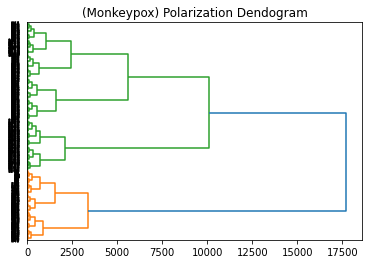

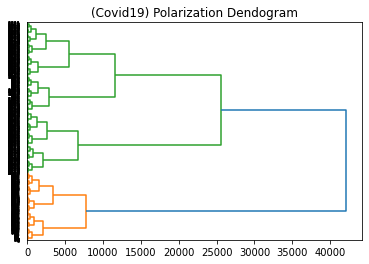

In [5]:
from scipy.cluster import hierarchy

# Data set
for item in dataMap:
    df = pd.read_csv(item["analysis"])
    dfxt= pd.read_csv(item["analysis"])
    df = df.set_index('username')
    df = df.drop(columns=['bot_type'])
    df = df.replace(np.nan, 0)
    
    # Calculate the distance between each sample
    Z = hierarchy.linkage(df, 'ward')
    
    # Orientation of the dendrogram
    hierarchy.dendrogram(Z, orientation="right", labels=None)
    plt.title(f"{item['title']} Polarization Dendogram")
    plt.savefig(f"{NSPATH}/figures/{item['title']} Cluster Polarization Dendogram.png")
    plt.show()

    # process datasets leaves to csv files
    hlx = hierarchy.leaves_list(Z)
    hldf = dfxt.to_dict("records")
    HLDXS  = []

    for cl in hlx:
      hldf[cl]["cluster_leaf"] = cl
      HLDXS.append(hldf[cl])

    dfc = pd.DataFrame.from_records(HLDXS)
    dfc.to_csv(f'{NSPATH}/csv_datasets/{item["title"]} - Cluster Polarization Dendogram.csv')

  



### Chaos in the Network (Generate Values)
Generate and print out values for visualizing chaos
Compare the Kuramoto values for network layers for monkeypox vs covid19

Monkeypox -> Human Layer kuramoto result 0.15517448297007863
Covid19 -> Human Layer kuramoto result 0.12356060010871082
Monkeypox -> Bot Layer kuramoto result 0.15982378727925403
Covid19 -> Bot Layer kuramoto result 0.16560080132719615
Monkeypox -> Tweet Layer kuramoto result 0.12793566569567155
Covid19 -> Tweet Layer kuramoto result 0.18701940999387104



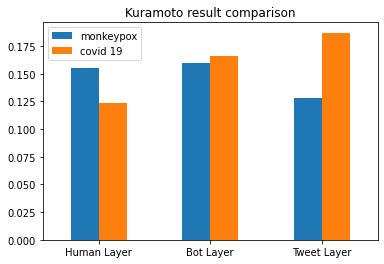

In [6]:
n_layers= ["Human Layer", "Bot Layer", "Tweet Layer"]
mp_kuramoto_values = []
cv_kuramoto_values = []



for lx in n_layers:
    mp_kuramoto_values.append(MP_DATASET_VARS[f"{lx} kuramoto result"])
    print(f"Monkeypox -> {lx} kuramoto result", MP_DATASET_VARS[f"{lx} kuramoto result"])
    cv_kuramoto_values.append(CV_DATASET_VARS[f"{lx} kuramoto result"])
    print(f"Covid19 -> {lx} kuramoto result", CV_DATASET_VARS[f"{lx} kuramoto result"])

# blot bar graph for both sets of values
df1 = pd.DataFrame({'monkeypox': mp_kuramoto_values,
                   'covid 19': cv_kuramoto_values}, index=n_layers)
df1.plot.bar(rot=0, title="Kuramoto result comparison");
plt.savefig(f"{NSPATH}/figures/{NAMESPACE}_kuramoto results comparison.png")

print()


### Potential energy drop (Line Graph)
- 1 Line Graph
- Arrange the array from highest to lowest
- Axis 1 - Covid 19
- Axis 2 - MonkeyPox
- Use Data from eigenDecomposition

Monkeypox Max Value before energy drop: 1.0000000000000022
Covid19 Max Value before energy drop: 1.0000000000000004


'Monkey pox, Pot. energy drop'

,0
0,1.000000e+00
1,1.000000e+00
2,1.000000e+00
3,1.000000e+00
4,1.000000e+00
...,...
479,-1.067953e-15
480,-1.156527e-15
481,-1.243054e-15
482,-1.378844e-15


'Covid 19 Pot energy drop'

,0
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
...,...
76,0.003043
77,0.002739
78,0.002465
79,0.002219


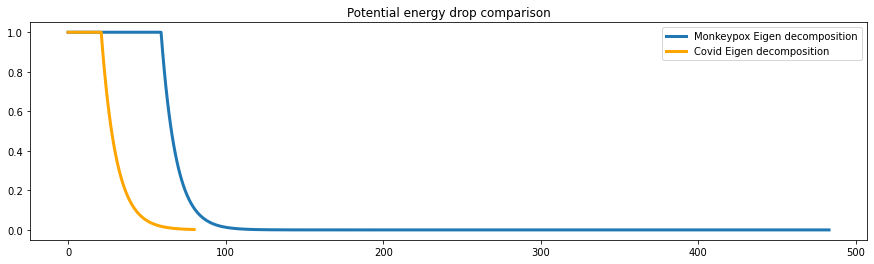

In [7]:
# linear interpolation to smooth out the values
def lin_inter(scalars, weight): 
    last = scalars[0]  
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  
        smoothed.append(smoothed_val)                       
        last = smoothed_val                                 
        
    return smoothed

mp_eigen_decomp = list(MP_DATASET_VARS["eigen_decomposition"].flatten().real)
cv_eigen_decomp = list(CV_DATASET_VARS["eigen_decomposition"].flatten().real)

# sort values in descending order
mp_eigen_decomp.sort(reverse=True)
cv_eigen_decomp.sort(reverse=True)

fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Potential energy drop comparison")
ax.plot(lin_inter(mp_eigen_decomp, .9), linewidth=3, label="Monkeypox Eigen decomposition");
ax.plot(lin_inter(cv_eigen_decomp,.9), color="orange", linewidth=3, label="Covid Eigen decomposition");

ax.legend()
plt.savefig(f"{NSPATH}/figures/{NAMESPACE} - Potential energy drop plot.png")

print("Monkeypox Max Value before energy drop:", max(lin_inter(mp_eigen_decomp, .9)))
print("Covid19 Max Value before energy drop:", max(lin_inter(cv_eigen_decomp,.9)))

mpdf = pd.DataFrame(lin_inter(mp_eigen_decomp, .9))
cvdf = pd.DataFrame(lin_inter(cv_eigen_decomp,.9))
display("Monkey pox, Pot. energy drop",mpdf,"Covid 19 Pot energy drop",cvdf)

mpdf.to_csv(f"{NSPATH}/csv_datasets/{NAMESPACE} Monkeypox potential energy drop plot.csv")
cvdf.to_csv(f"{NSPATH}/csv_datasets/{NAMESPACE} Covid 19 potential energy drop plot.csv")

### Kinetic Engery discharge at the edges of nodes
- Linegraph
- Linear Interpolation
- 2 axis for Covid19 and MonkeyPox
- Data from eigen decomposition
- No ordering from the array

Add: Use bot energy to add to eigen decomposition values

Monkeypox Max (Ke) discharge: 0.46498865005198464
Covid19 Max (Ke) discharge: 0.4562895753828408


'Monkey pox, Ke Discharge'

,0
0,-2.600959e-15
1,-2.362409e-15
2,-2.150907e-15
3,-1.916544e-15
4,-1.712644e-15
...,...
479,1.010466e-01
480,9.094197e-02
481,8.184777e-02
482,7.366300e-02


'Covid 19 Ke discharge'

,0
0,1.618430e-16
1,1.364613e-16
2,1.192310e-16
3,1.055407e-16
4,9.633842e-17
...,...
76,2.261739e-01
77,2.035565e-01
78,1.832009e-01
79,2.648808e-01


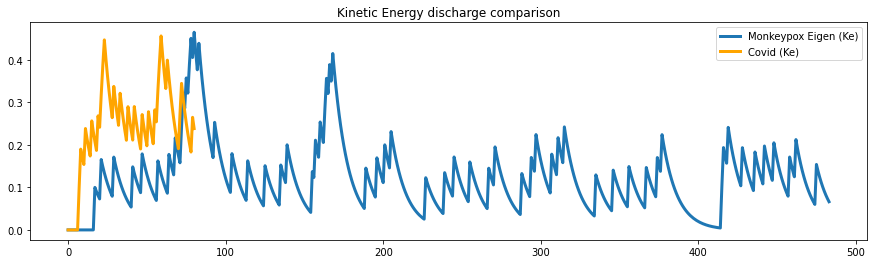

In [8]:
mp_dataset_bot_energy = np.average(MP_DATASET_VARS["equation2_bot_energy"].flatten().real)
cv_dataset_bot_energy = np.average(CV_DATASET_VARS["equation2_bot_energy"].flatten().real)

mp_eigen_decomp = list(MP_DATASET_VARS["eigen_decomposition"].flatten().real)
cv_eigen_decomp = list(CV_DATASET_VARS["eigen_decomposition"].flatten().real)

# inject dataset bot energy of the namespace dataset to its own eigen decomposition
[lambda x: x+mp_dataset_bot_energy for x in mp_eigen_decomp]
[lambda x: x+cv_dataset_bot_energy for x in cv_eigen_decomp]

fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Kinetic Energy discharge comparison")
ax.plot(lin_inter(mp_eigen_decomp, .9), linewidth=3, label="Monkeypox Eigen (Ke)");
ax.plot(lin_inter(cv_eigen_decomp,.9), color="orange", linewidth=3, label="Covid (Ke)");

ax.legend()
plt.savefig(f"{NSPATH}/figures/{NAMESPACE} - Kinetic energy discharge plot.png")

print("Monkeypox Max (Ke) discharge:", max(lin_inter(mp_eigen_decomp, .9)))
print("Covid19 Max (Ke) discharge:", max(lin_inter(cv_eigen_decomp,.9)))

mpdf = pd.DataFrame(lin_inter(mp_eigen_decomp, .9))
cvdf = pd.DataFrame(lin_inter(cv_eigen_decomp,.9))
display("Monkey pox, Ke Discharge",mpdf,"Covid 19 Ke discharge",cvdf)

mpdf.to_csv(f"{NSPATH}/csv_datasets/{NAMESPACE} Monkeypox Kinetic energy discharge plot.csv")
cvdf.to_csv(f"{NSPATH}/csv_datasets/{NAMESPACE} Covid 19 Kinetic energy discharge plot.csv")


### Mass and Energy Projection
Compton Scattering, 
1. Youtube: https://youtu.be/BJUasLU9rCY
2. Check PDF to replace values
3. follow: https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid30.ipynb


An incident particle scatters off something, and leaves with solid angle $d\Omega$. Note that

$$d\sigma \propto d\Omega$$

It is related through the differential scattering

$$d\sigma = D(\theta)d\Omega \implies  D(\theta) = \frac{d\sigma}{d\Omega}$$

Relate this to something like density $\rho = \frac{dm}{dV}$ which tells you how much $dm$ there is per volume $dV$. So $d\sigma/d\Omega$ tells you how much $d\sigma$ there is per scattering angle $d\Omega$.

**Quantum Theory**: Incident particle is photon which scatters off electron (*Compton Scattering*):

$$\frac{d\sigma}{d\Omega} = \frac{r_e^2}{2}\frac{1+\cos^2\theta}{1+\alpha(1-\cos\theta)^2} \left[1+\frac{\alpha^2(1-\cos\theta)^2}{(1+\cos^2\theta)(1+\alpha(1-\cos\theta))}\right]$$

* $r_e=2.818\times 10^{-15}$m is the classical electron radius
* $\alpha=E/(mc^2)$ where $E$ is the energy of the incoming photon and $m$ is the mass of the electron


### Problem 1

We want to find the **probability** that a photon scatters at an angle $\theta$

* **Part A**: Compute $d\sigma/d\theta$

* **Part B**: Compute $\sigma$ 

* **Part C**: Use $d\sigma/d\theta$ and $\sigma$ to find the probability density function $f(\theta)$


### Part A

Since

$$\begin{align} \sigma &= \int d\sigma\\ 
&=\int \frac{d\sigma}{d\Omega} d\Omega\\
&= \int_{0}^{2\pi} \int_{0}^{\pi} \frac{d\sigma}{d\Omega} \sin\theta d\theta d\phi\\
&= \int_{0}^{\pi} \left( \int_{0}^{2\pi}  \frac{d\sigma}{d\Omega} \sin\theta d\phi \right) d\theta\\
&= \int_{0}^{\pi} \left( 2\pi  \frac{d\sigma}{d\Omega} \sin\theta \right) d\theta \end{align}$$

We can identify the bracket term as $d\sigma/d\theta$:

$$\frac{d\sigma}{d\theta} = 2\pi  \frac{d\sigma}{d\Omega} \sin\theta$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
# plt.style.use(['science', 'notebook'])
import sympy as smp


theta, alpha = smp.symbols(r'\theta \alpha', real=True, positive=True)

theta, alpha = smp.symbols(r'\theta \alpha', real=True, positive=True)
dsdo = smp.Rational(1,2)*(1+smp.cos(theta)**2)/(1+alpha*(1-smp.cos(theta)))**2 * \
            ( 1 + alpha**2 * (1-smp.cos(theta))**2 / ((1+smp.cos(theta)**2)*(1+alpha*(1-smp.cos(theta)))))
dsdt = 2*smp.pi*dsdo*smp.sin(theta)
dsdt = dsdt.simplify()
dsdt

pi*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*sin(\theta)/(\alpha*(cos(\theta) - 1) - 1)**3

### Part B

e need to compute $\int_0^{\pi} \frac{d\sigma}{d\theta} d\theta$. Good luck doing that without computer algebra:

In [10]:
s = smp.integrate(dsdt, (theta, 0, smp.pi))
s = s.simplify().simplify()
s

pi*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1))/(\alpha**3*(4*\alpha**2 + 4*\alpha + 1))

### Part C

**Extremely Important Point**: If the incoming flux of particles is uniform then
$$p(\theta) = f(\theta)d\theta \propto  \frac{d\sigma}{d\theta}d\theta$$

so we can write 

$$f(\theta) = C\frac{d\sigma}{d\theta}$$

Now we need to enforce $\int_0^{\pi} f(\theta)d\theta = 1$ so this means

$$1 = \int_0^{\pi} f(\theta)d\theta = C\int_0^{\pi} \frac{d\sigma}{d\theta} = C\sigma$$

and thus $C=1/\sigma$ and

$$\boxed{f(\theta) = \frac{1}{\sigma} \frac{d\sigma}{d\theta}}$$

In [11]:
pdf_theta = dsdt / s
pdf_theta=pdf_theta.simplify()
pdf_theta

-\alpha**3*(\alpha**2*(cos(\theta) - 1)**2 - (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)*sin(\theta)/((\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

We can also get the pdf over the whole sphere 

$$\boxed{g(\theta, \phi) = \frac{1}{\sigma} \frac{d\sigma}{d\Omega}}$$

In [12]:
pdf_omega = dsdo / s
pdf_omega=pdf_omega.simplify()
pdf_omega

\alpha**3*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(2*pi*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

In [13]:
pdf_theta_f = smp.lambdify([theta,alpha], pdf_theta)
pdf_omega_f = smp.lambdify([theta,alpha], pdf_omega)

Lets do a simple plot for $\alpha=2$

In [14]:
the = np.linspace(0, np.pi, 1000)
pdf_t = pdf_theta_f(the, 0.1)
pdf_o = pdf_omega_f(the, 0.1)

Use a polar plot where the angle represents the polar angle $\theta$ and the radius represents the probaility density function

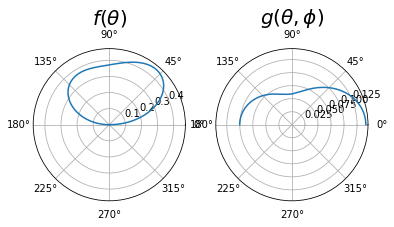

In [15]:
fig, axes = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
axes[0].plot(the, pdf_t)
axes[0].set_title(r'$f(\theta)$', fontsize=20)
axes[1].plot(the, pdf_o)
axes[1].set_title(r'$g(\theta, \phi)$', fontsize=20)
plt.show()

Get interval of $\theta$ from 0 to $\pi$ and some different values of $\alpha=E/m$ to make an animation

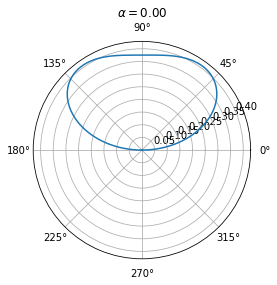

In [16]:
theta = np.linspace(0, np.pi, 1000)
alphas = 10.0** np.linspace(-3,4,300)
pdfs = [pdf_theta_f(theta, alpha) for alpha in alphas]


# make animation

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ln, = plt.plot([], [])

def animate(i):
    ax.clear()
    ax.plot(theta, pdfs[i])
    ax.set_title(r'$\alpha=$'+f'{alphas[i]:.2f}')
    
ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
ani.save(f'{NSPATH}/figures/{NAMESPACE} energy_projection1.gif',writer='pillow',fps=30,dpi=100)

### Problem B

Find the probability density function of

* **Part A**: Outgoing photon energy $E' = \frac{E}{1+\alpha(1-\cos\theta)}$ so need $f(E')$
* **Part B**: Outgoing electron energy $T = E-E' = \frac{E\alpha(1-\cos\theta)}{1+\alpha(1-\cos\theta)}$ so need $f(T)$

**These formulas are just the basic compton scattering formulas you can get from any basic physics textbook!**

(Remember $\alpha = E/(mc^2)$)

### Part A

We know that

$$\begin{align}
f(E') &= \frac{1}{\sigma} \frac{d\sigma}{dE'}\\
&= \frac{1}{\sigma} \frac{d\sigma}{d\theta} \left(\frac{dE'}{d\theta}\right)^{-1}\\
\end{align}$$

We need to find all of these variables in terms of $E'$

In [17]:
E, Ep, alpha, T, theta = smp.symbols(r"E E' \alpha T \theta", real=True, positive=True)


Ep_expr = E/(1+alpha*(1-smp.cos(theta)))
Ep_expr

E/(\alpha*(1 - cos(\theta)) + 1)

In [18]:
Ep - Ep_expr

-E/(\alpha*(1 - cos(\theta)) + 1) + E'

To get $\theta(E')$ (which we need to plug into the expression above), we need to solve `Ep=Ep_expr`

In [19]:
theta_expr = smp.solve(Ep-Ep_expr, theta)[1]
theta_expr

acos((-E + E'*\alpha + E')/(E'*\alpha))

In [20]:
pdf_Ep = 1/s * dsdt / smp.diff(Ep_expr, theta)
pdf_Ep

-\alpha**2*(\alpha*(1 - cos(\theta)) + 1)**2*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(E*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1)))

The problem is its expressed in terms of $\theta$ and not $E'$. We can substitute in our $\theta$ expression above to solve this

In [21]:
pdf_Ep = pdf_Ep.subs(theta, theta_expr).simplify()
pdf_Ep

-(E*(E'**2*\alpha**2 + (-E + E'*\alpha + E')**2) + E'*\alpha**2*(E - E')**2)*(4*\alpha**2 + 4*\alpha + 1)/(E**2*E'**2*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

This should be normalized to 1. We can perform a consistency check by integrating over all values of $E'$. Examining the expression $E' = \frac{E}{1+\alpha(1-\cos\theta)}$, we see that at $\theta=0$, we have $E'=E$ and at $\theta=\pi$ we have $E'=E/(1+2\alpha)$

In [22]:
smp.integrate(pdf_Ep, (Ep, E, E/(1+2*alpha))).simplify()

1

### Part B
We know that

$$\begin{align}
f(T) &= \frac{1}{\sigma} \frac{d\sigma}{dT}\\
&= \frac{1}{\sigma} \frac{d\sigma}{d\theta} \left(\frac{dT}{d\theta}\right)^{-1}\\
\end{align}$$

We need to find all of these variables in terms of $E'$

In [23]:
T_expr = E*alpha*(1-smp.cos(theta))/(1+alpha*(1-smp.cos(theta)))
theta_expr = smp.solve(T-T_expr, theta)[1]
pdf_T = 1/s * dsdt / smp.diff(T_expr, theta)
pdf_T = pdf_T.subs(theta, theta_expr).simplify()
pdf_T

(\alpha**2*(E - T)*(-E*\alpha + T*\alpha + T + \alpha*(E - T))**2 - (\alpha**2*(E - T)**2 + (-E*\alpha + T*\alpha + T)**2)*(E*\alpha - E - T*\alpha - \alpha*(E - T)))*(4*\alpha**2 + 4*\alpha + 1)/(E*(-E + T)**2*(-E*\alpha + E + T*\alpha + \alpha*(E - T))*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

Again we can check that its normalized. Examining $T=\frac{E\alpha(1-\cos\theta)}{1+\alpha(1-\cos\theta)}$ we have $T=0$ at $\theta=0$ and $T=2E\alpha/(1+2\alpha)$ at $\theta=\pi$

### Get Dataset variables from Covid and Monkeypox disinformation pipeline
1. Get values for total mass equivalent and virality of bot
2. replace m and aplha values


In [24]:
mp_nas = pd.read_csv("./monkeypox/csv_datasets/monkeypox_network_statistics_per_column.csv")
cv_nas = pd.read_csv("./covid_19/csv_datasets/covid_19_network_statistics_per_column.csv")

mp_m = mp_nas["mass_equivalent"][0]
mp_alpha = MP_DATASET_VARS["equation4_virality_of_bots"]

cv_m = cv_nas["mass_equivalent"][0]
cv_alpha = CV_DATASET_VARS["equation4_virality_of_bots"]

energy_projection_map = [
    {
        "name": "Monkeypox",
        "m": mp_m,
        "alpha": mp_alpha
    },
    {
        "name": "Covid 19",
        "m": cv_m,
        "alpha": cv_alpha
    }
]

print(energy_projection_map)

[{'name': 'Monkeypox', 'm': 4.6952694078208707e-11, 'alpha': 0.7727272727272726}, {'name': 'Covid 19', 'm': 9.758457995488408e-11, 'alpha': 0.5555555555555555}]


### Energy projection for monkeypox

Processing => Monkeypox


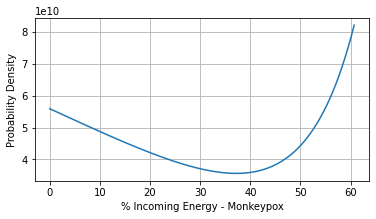

Processing => Covid 19


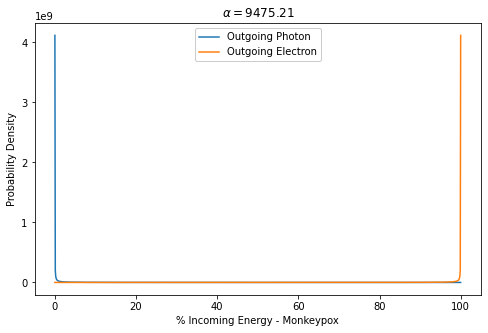

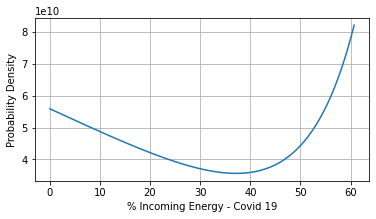

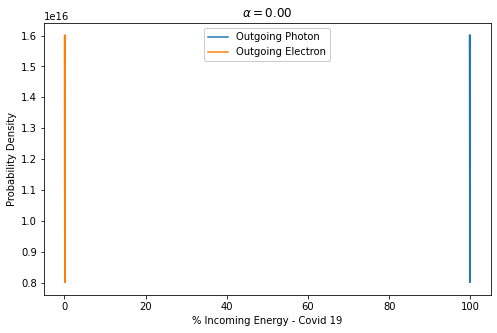

In [25]:
for eb in energy_projection_map:
    print("Processing =>", eb["name"])

    E, Ep, alpha, T, theta = smp.symbols(r"E E' \alpha T \theta", real=True, positive=True)


    Ep_expr = E/(1+alpha*(1-smp.cos(theta)))
    Ep_expr

    smp.integrate(pdf_T, (T, 0, 2*E*alpha/(1+2*alpha))).simplify()

    pdf_Ep_f = smp.lambdify([Ep, E, alpha], pdf_Ep)
    pdf_T_f = smp.lambdify([T, E, alpha], pdf_T)

    m = mp_m
    alpha = mp_alpha
    E = alpha*m
    Ep = np.linspace(E/(1+2*alpha), E, 1000)
    T = np.linspace(0, 2*E*alpha/(1+2*alpha), 1000)

    plt.figure(figsize=(6,3))
    #plt.plot(100*Ep/(E), -pdf_Ep_f(Ep, E, alpha), label='Outgoing Photon')
    plt.plot(100*T/(E), pdf_T_f(T, E, alpha), label='Outgoing Electron')
    plt.xlabel(f'% Incoming Energy - {eb["name"]}')
    plt.ylabel('Probability Density')
    #plt.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
    plt.grid()
    plt.savefig(f'{NSPATH}/figures/{NAMESPACE} {eb["name"]} energy projection B.png', dpi=200)
    plt.show()

    alphas = 10.0** np.linspace(-3,4,300)
    Eps = [np.linspace(alpha*m/(1+2*alpha), alpha*m, 1000) for alpha in alphas]
    Ts = [np.linspace(0, 2*alpha*m*alpha/(1+2*alpha), 1000) for alpha in alphas]
    pdfs_Ep = [-pdf_Ep_f(Ep, alpha*m, alpha) for (alpha, Ep) in zip(alphas, Eps)]
    pdfs_T = [pdf_T_f(T, alpha*m, alpha) for (alpha, T) in zip(alphas, Ts)]

    fig, ax = plt.subplots(figsize=(8,5))

    def animate(i):
        alpha = alphas[i]; Ep=Eps[i]; T = Ts[i]
        E = m*alpha
        ax.clear()
        ax.plot(100*Ep/E, -pdf_Ep_f(Ep, E, alpha), label='Outgoing Photon')
        ax.plot(100*T/E, pdf_T_f(T, E, alpha), label='Outgoing Electron')
        ax.set_xlabel(f'% Incoming Energy - {eb["name"]}')
        ax.set_ylabel('Probability Density')
        ax.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
        ax.set_title(r'$\alpha=$'+f'{alpha:.2f}')
        plt.savefig(f'{NSPATH}/figures/animation_frames/{NAMESPACE} - {eb["name"]} [FRAME# {i}] - energy projection.png')

        
    ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
    ani.save(f'{NSPATH}/figures/{NAMESPACE} - {eb["name"]} - energy projection animation.gif',writer='pillow',fps=30,dpi=100)



### Energy in the Network
- Using array for Bot Energy data (Research Equations)
- Line Graph -> Scatter Line / Smooth Interpolation
- 2 axis - Monkey pox and Covid 19

Monkeypox Min energy: 1.1667883674613045e-15
Covid19 Max energy: 2.5341466435662494e-15


'Monkey pox, energy in network values'

,0
0,0.000000e+00
1,1.166788e-15
2,2.916985e-16
3,1.296448e-16
4,7.292606e-17
...,...
1417,7.292606e-17
1418,1.296448e-16
1419,2.916985e-16
1420,1.166788e-15


'Covid energy in network values'

,0
0,0.000000e+00
1,2.534147e-15
2,6.335376e-16
3,2.815730e-16
4,1.583854e-16
...,...
2543,1.583854e-16
2544,2.815730e-16
2545,6.335376e-16
2546,2.534147e-15


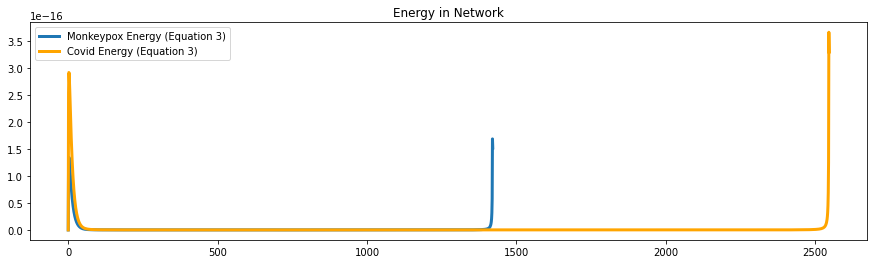

In [26]:
mp_energy = list(MP_DATASET_VARS["equation3_energy_in_network"].flatten().real)
cv_energy = list(CV_DATASET_VARS["equation3_energy_in_network"].flatten().real)



fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Energy in Network")
ax.plot(lin_inter(mp_energy, .9), linewidth=3, label="Monkeypox Energy (Equation 3)");
ax.plot(lin_inter(cv_energy,.9), color="orange", linewidth=3, label="Covid Energy (Equation 3)");

ax.legend()
plt.savefig(f"{NSPATH}/figures/{NAMESPACE} - Energy in network plot.png")

print("Monkeypox Min energy:", max(mp_energy))
print("Covid19 Max energy:", max(cv_energy))

mpdf = pd.DataFrame(mp_energy)
cvdf = pd.DataFrame(cv_energy)
display("Monkey pox, energy in network values",mpdf,"Covid energy in network values",cvdf)

mpdf.to_csv(f"{NSPATH}/csv_datasets/{NAMESPACE} Monkeypox energy in network plot.csv")
cvdf.to_csv(f"{NSPATH}/csv_datasets/{NAMESPACE} Covid 19 energy in network plot.csv")

### Bot Energy + Network Energy
1. Get data from Audion file "spectrogram_audio.wav"
2. GetPeak Frequencies of the Audio file in Hz
3. Convert Hz to Joules, each point of frequency is divided by constant 1.50919031167677E+33 Hz
4. Values of bot_energy.txt is combined with array in no. 3
5. Sort the array to ascending order


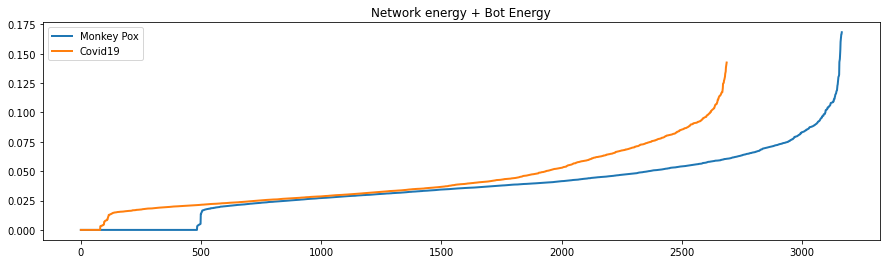

In [27]:
from scipy import signal
from scipy.io import wavfile

beneMap = []

for item in dataMap: 
   
    sample_rate, samples = wavfile.read(item["audio"])
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    flat_spec = lin_inter(spectrogram.flatten(),0.9)
    peak_widths = np.arange(0.1, 1)
    peak_indexes = signal.find_peaks_cwt(flat_spec, peak_widths)
    peak_frequencies = []
    pfc = []
    bot_energy = np.loadtxt(item["energy_txt"], delimiter=",").flatten()

    # parse peak frequencies
    for ix in peak_indexes:
        peak_frequencies.append(flat_spec[ix])

    # parse pf with constant Hz
    for ix in peak_frequencies:
        pfc.append(ix/1.50919031167677**33)

    bene = pfc + list(bot_energy)
    bene.sort()
    beneMap.append(bene)

    dfxbene = pd.DataFrame()
    dfxbene[f'network_energy_and_bot_energy'] = bene
    dfxbene.to_csv(f'{NSPATH}/csv_datasets/ {item["title"]} - Network Energy + Bot Energy.csv')

fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Network energy + Bot Energy")
ax.plot(beneMap[0], linewidth=2, label="Monkey Pox");
ax.plot(beneMap[1], linewidth=2, label="Covid19");

ax.legend()  
plt.savefig(f"{NSPATH}/figures/Network energy + Bot Energy.png")



### Wavelet Transform 
- Implement Wavelet Transform for the simulated signal

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\wavelets.py:480: ComplexWarning: Casting complex values to real discards the imaginary part
  output[ind] = convolve(data, wavelet_data, mode='same')


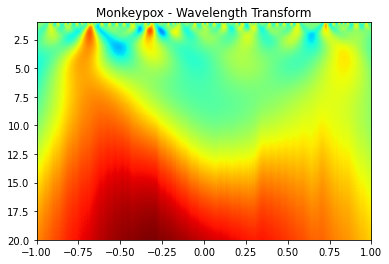

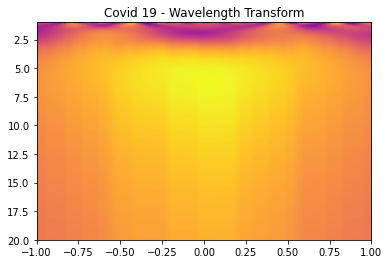

<Figure size 432x288 with 0 Axes>

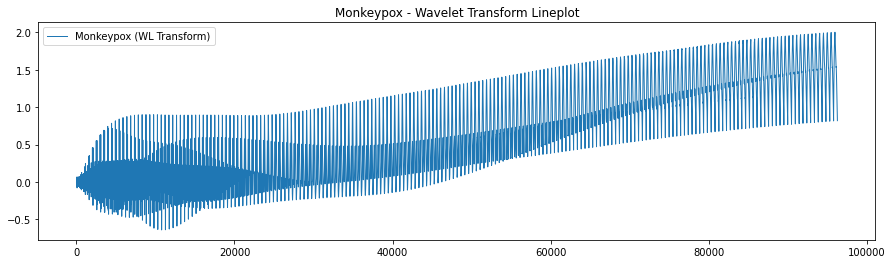

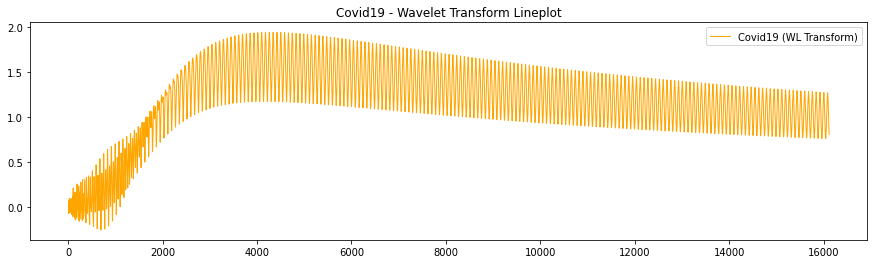

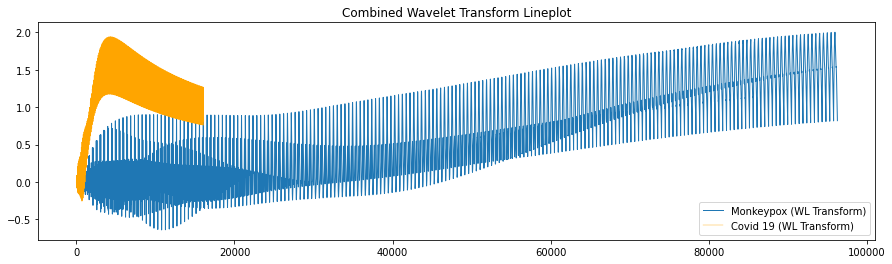

In [28]:
from scipy import signal
import matplotlib.pyplot as plt

waveletMap = [
    {
    "title":"Monkeypox - Wavelength Transform",
    "data": MP_DATASET_VARS["eigen_decomposition"].flatten(),
    "cmap": "jet"
},
{
    "title":"Covid 19 - Wavelength Transform",
    "data": CV_DATASET_VARS["eigen_decomposition"].flatten(),
    "cmap": "plasma"
}
]

cwtSignals =[]

def generateWaveletTransform(data):
    t = np.linspace(0, 500, 200, endpoint=False)
    # sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
    sig = data["data"]
    widths = np.arange(1, 200)
    cwtmatr = signal.cwt(sig, signal.ricker, widths)


    plt.title(data["title"])
    plt.imshow(cwtmatr, extent=[-1, 1, 20, 1], cmap=data["cmap"], aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.show()

    plt.savefig(f"{NSPATH}/figures/{NAMESPACE} - {data['title']} plot.png")


    cwtSignals.append(cwtmatr.flatten())

for item in waveletMap:
    generateWaveletTransform(item)

fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Monkeypox - Wavelet Transform Lineplot")
ax.plot(lin_inter(cwtSignals[0], .9), linewidth=1, label="Monkeypox (WL Transform)");
plt.savefig(f"{NSPATH}/figures/{NAMESPACE} Monkeypox - Wavelet Transform Lineplot.png")


ax.legend()    

fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Covid19 - Wavelet Transform Lineplot")
ax.plot(lin_inter(cwtSignals[1], .9), linewidth=1, color="orange", label="Covid19 (WL Transform)");
plt.savefig(f"{NSPATH}/figures/{NAMESPACE} Covid19 - Wavelet Transform Lineplot.png")


ax.legend()    

# combined line plot
fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Combined Wavelet Transform Lineplot")
ax.plot(lin_inter(cwtSignals[0], .9), linewidth=1, label="Monkeypox (WL Transform)");
ax.plot(lin_inter(cwtSignals[1],.9), color="orange", linewidth=0.4, label="Covid 19 (WL Transform)");

ax.legend()    
plt.savefig(f"{NSPATH}/figures/{NAMESPACE} - Combined Wavelet Transform Lineplot.png")

# CREATE csv datasets
mvwdlf = pd.DataFrame()
mvwdlf["monkeypox_wlt"] = lin_inter(cwtSignals[0], .9)
cvwdlf = pd.DataFrame()
cvwdlf["covid19_wlt"] = lin_inter(cwtSignals[1], .9)

mvwdlf.to_csv(f"{NSPATH}/csv_datasets/Monkeypox Wavelet Transform Signal.csv")
cvwdlf.to_csv(f"{NSPATH}/csv_datasets/Covid19 Wavelet Transform Signal.csv")

###  Visualizations (Adjacency Matrices)
- Use data from 2nd Network Analysis table for covid and monkeypox
- adjacency matrix for each column

### Feb. 26, 2023
- Connectome mapper will be replace with maplotlib imshow

processing.... => Monkeypox - 2nd network Analysis Adj. Matrices per column
eigenvector_centrality
betweenness_centrality
closeness_centrality
clique_number
page_rank
random_walk
processing.... => Covid19 - 2nd network Analysis Adj. Matrices per column
eigenvector_centrality
betweenness_centrality
closeness_centrality
clique_number
page_rank
random_walk


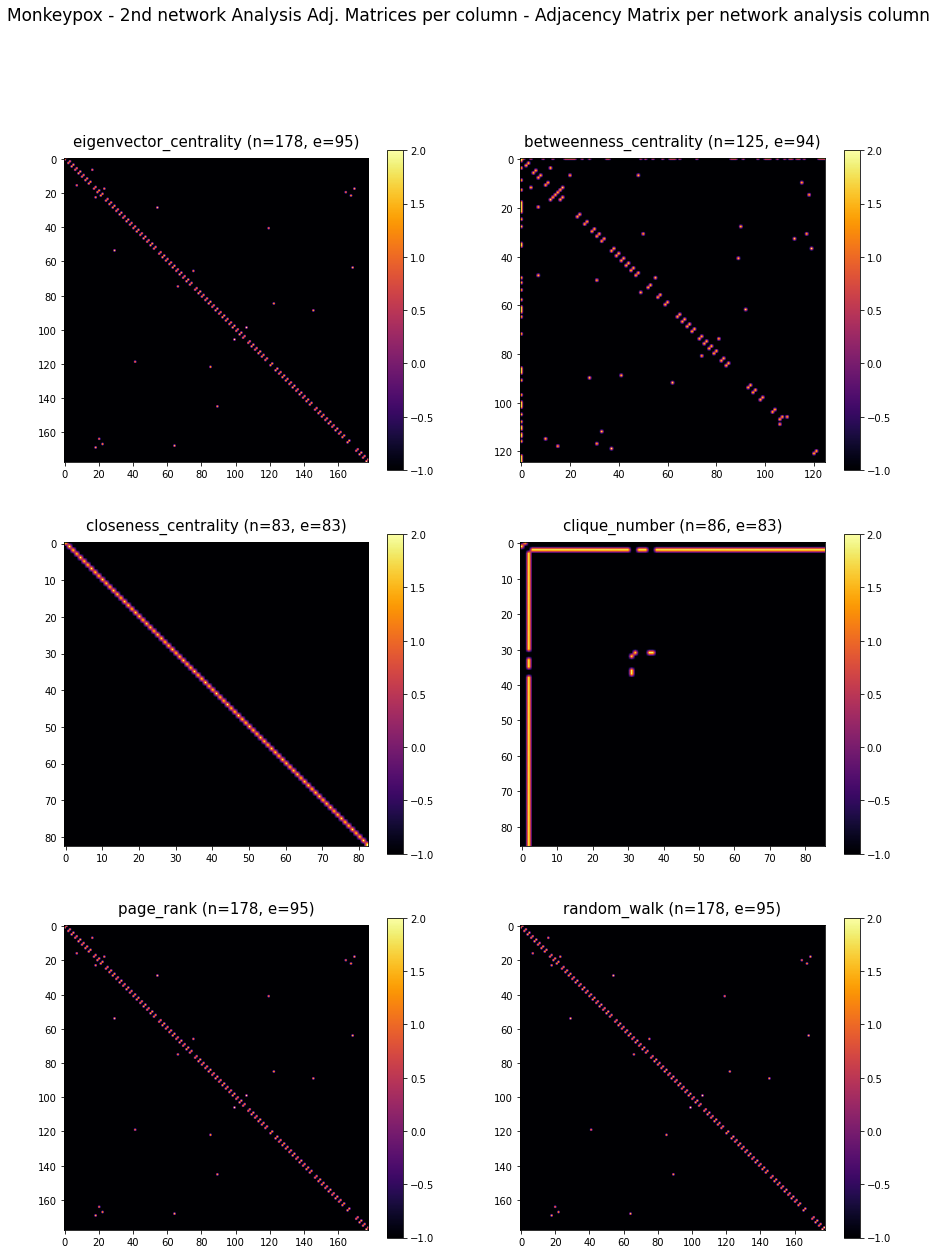

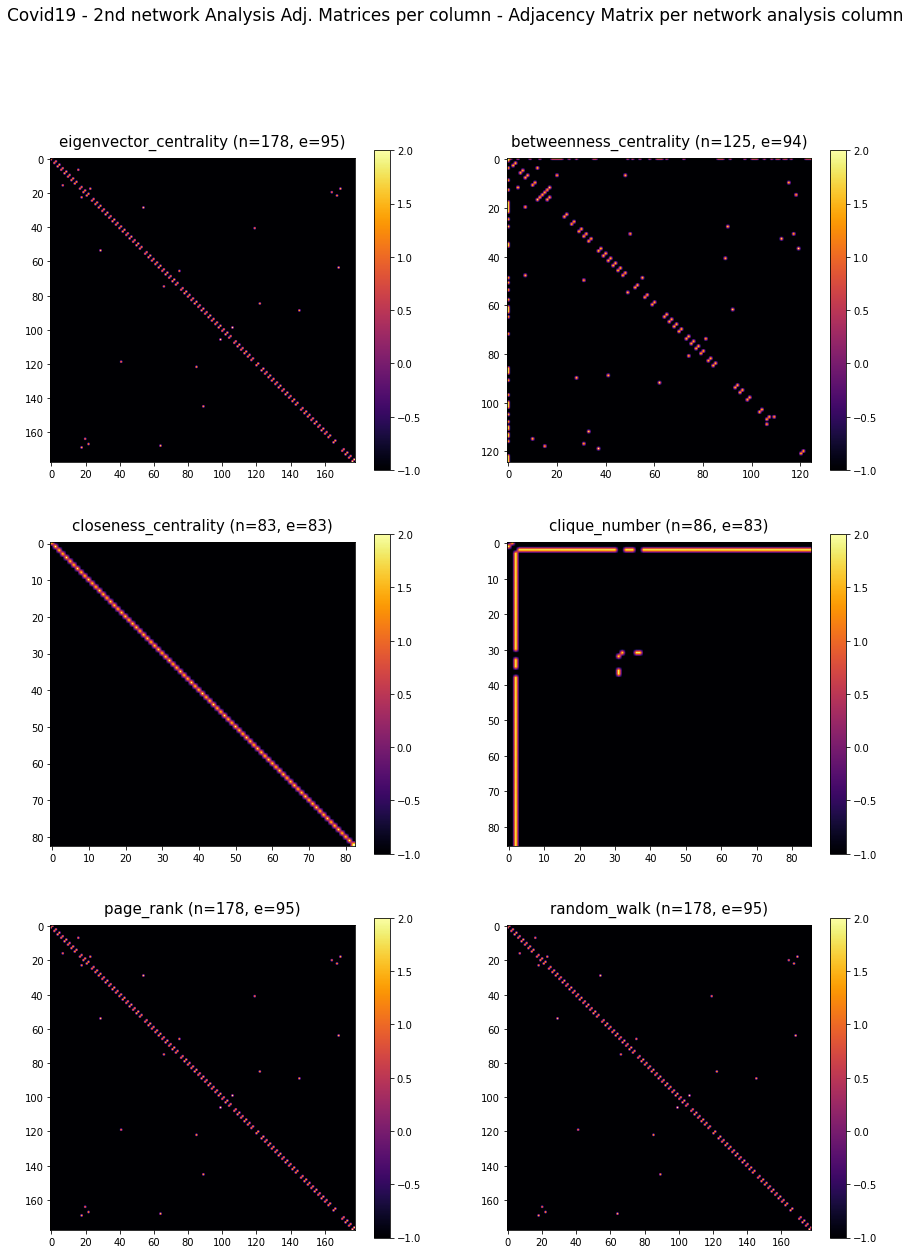

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm


cols_to_plot = ["eigenvector_centrality","betweenness_centrality","closeness_centrality","clique_number","page_rank", "random_walk"]

target_tables = [
    {
    "name": "Monkeypox - 2nd network Analysis Adj. Matrices per column",
     "data_path": "./monkeypox/csv_datasets/monkeypox - 2nd_network_analysis_raw_data.csv"
    },
      {
    "name": "Covid19 - 2nd network Analysis Adj. Matrices per column",
     "data_path": "./monkeypox/csv_datasets/monkeypox - 2nd_network_analysis_raw_data.csv"
    }
]


for table in target_tables: 
    print("processing.... =>", table["name"])

    txData = pd.read_csv(table["data_path"])
    txData = txData[cols_to_plot]

    Graphtype = nx.Graph()
 
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    ax = axs.flat

    for i,xg in enumerate(cols_to_plot):
        print(xg)
        G = nx.from_pandas_edgelist(txData, source=xg, target=cols_to_plot[2])
        # covert network data to adjacency matrix array
        ajD = nx.adjacency_matrix(G).toarray()
        ax[i].imshow(ajD, interpolation="bilinear", cmap="inferno")
        sm = plt.cm.ScalarMappable(cmap=plt.cm.inferno, norm=plt.Normalize(vmin = -1, vmax=2))
        sm._A = []
        plt.colorbar(sm, ax=ax[i])
        ax[i].set_title(f"{xg} (n={G.number_of_nodes()}, e={G.number_of_edges()})", fontsize=15, y=1.02)
        
    fig.suptitle(f'{table["name"]} - Adjacency Matrix per network analysis column', fontsize=17 )
    plt.savefig(f'{NSPATH}/figures/{table["name"]} - Adjacency Matrix per network analysis column.png')    



### Phase Factor (New Equation)
1. Implement new equations based on paper oultline
2. Plot Histrogram - Check if 3d is possible

In [43]:

for i, x in enumerate(dataMap):
    targetDVAR = dataMap[0]["dataVAR"]
    delta = dataMap[i]
    dfpf = pd.read_csv(f'./{delta["name_space"]}/csv_datasets/{delta["name_space"]}_network_statistics_per_column.csv')


    c2 = 8.98755179**16
    aveN = np.average(targetDVAR["equation3_energy_in_network"])
    mass_equivalent_per_node = dfpf["mass_equivalent"][0]

    phaseFactor = np.sqrt((2*aveN)/(mass_equivalent_per_node*c2))


    # following steps
    step1 = dfpf["critical_threshold_after_node_virality"][0] - dfpf["critical_threshold_before_node_virality"][0]
    step2 = step1 * targetDVAR["method2_max_value"]
    tunnelingTime = step2 + phaseFactor

    print(delta["name_space"])
    print("Method 2 - first paper, max value =>",  targetDVAR["method2_max_value"])
    print("Tunneling Time =>",tunnelingTime)
    print("Phase Factor =>", phaseFactor)


monkeypox
Method 2 - first paper, max value => 18.44130719460075
Tunneling Time => 7.967821809759733e-12
Phase Factor => 7.968046809160228e-12
covid_19
Method 2 - first paper, max value => 18.44130719460075
Tunneling Time => 5.514078054510508e-12
Phase Factor => 5.527026367470568e-12


### Power Spectral Density

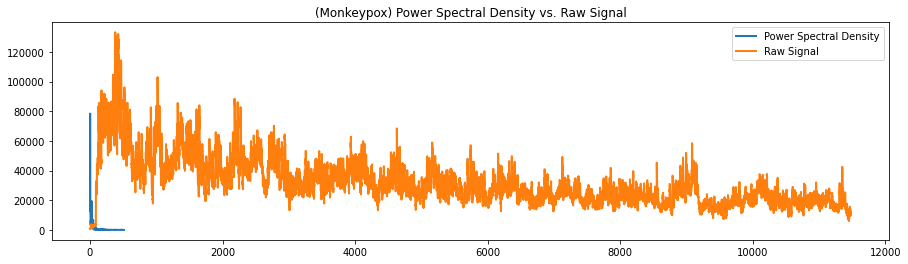

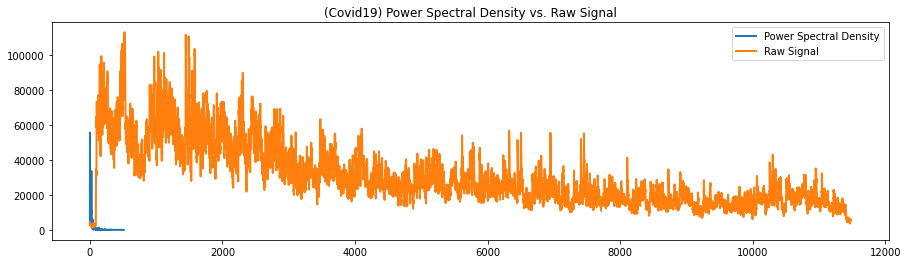

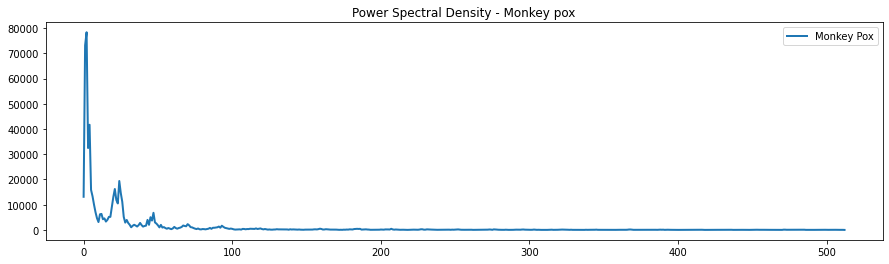

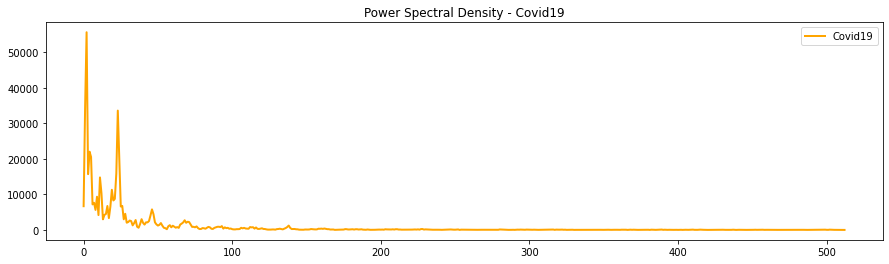

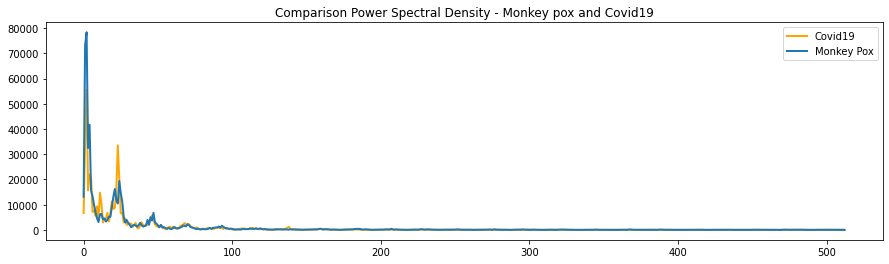

In [33]:
from scipy import signal
from scipy.io import wavfile

beneMap = []

for item in dataMap: 
   
    sample_rate, samples = wavfile.read(item["audio"])
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

    flat_spec = lin_inter(spectrogram.flatten(),0.9)
    psd1, psd2 = signal.welch(flat_spec, 10e4, nperseg=1024, average='median')
       
    beneMap.append(psd2)

    fig, ax = plt.subplots(figsize=(15,4))
    ax.set_title(f"{item['title']} Power Spectral Density vs. Raw Signal")
    ax.plot(psd2, linewidth=2, label="Power Spectral Density");
    ax.plot(flat_spec, linewidth=2, label="Raw Signal");

    ax.legend()  

    plt.savefig(f"{NSPATH}/figures/{item['title']} Power Spectral Density vs. Raw Signal.png")



    dfxbene = pd.DataFrame()
    dfxbene[f'PSD'] = psd2
    dfxbene.to_csv(f'{NSPATH}/csv_datasets/ {item["title"]} - Power Spectral Density vs. Raw Signal.csv')

fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Power Spectral Density - Monkey pox")
ax.plot(beneMap[0], linewidth=2, label="Monkey Pox");
ax.legend()  
plt.savefig(f"{NSPATH}/figures/Power Spectral Density - Monkey pox.png")


fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Power Spectral Density - Covid19")
ax.plot(beneMap[1], linewidth=2, color="orange", label="Covid19");
ax.legend()  
plt.savefig(f"{NSPATH}/figures/Power Spectral Density - Covid19.png")


fig, ax = plt.subplots(figsize=(15,4))
ax.set_title(f"Comparison Power Spectral Density - Monkey pox and Covid19")
ax.plot(beneMap[1], linewidth=2, label="Covid19", color="orange");
ax.plot(beneMap[0], linewidth=2, label="Monkey Pox");

ax.legend()  
plt.savefig(f"{NSPATH}/figures/Comparison Power Spectral Density - Monkey pox and Covid19.png")

### [Final / New contract] Visualize Sonification for Each Tweet type
1. Create an audio file for each simulated Bot Tweet Type
2. Visualize audio signal from each audio files
3. Graph each signal for each Bot type
4. Generate intervals for the Geiger Counter ticks

In [34]:
import os
# import pickle

#save dataset vars for the pipeline run

# with open(f"{NSPATH}/{NAMESPACE}-dataset-variables.p", 'wb') as fp:
#     pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)

# tts = gtts.gTTS("Pipeline Completed successfully!")
# tts.save("complete.mp3")

os.system("start complete.mp3")

0